___
# Ciência dos Dados - PROJETO 1

# Renan Cabral
___

___
## Introdução

Ao longo desta projeto de análise do banco de dados da PNAD serão análisados os dados de acessibilidade à internet e acesso a banda larga no Brasil, em todas as suas regiões, observando regiões como São Paulo e Maranhão a fim de analisar fatores que possam afetar e presença deste (acessibilidade e banda larga), além de observar o avanço da acessibilidade no Brasil ao longo dos anos pesquisados.

## Pergunta:

Qual o principal fator ou fatores que afeta a acessibilidade à banda larga no Brasil ? Levando em consideração fatores como região, PIB do estado, renda média dentre outros.

In [56]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [57]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Renan Cabral\Documents\GitHub\Ci-ncia_dos_dados_2017


In [58]:
dados=pd.read_csv('DOM2015csv.zip',sep=',')
dados_geral=pd.read_csv('DOM2015csv.zip',sep=',')

## 2015

In [59]:
#dados Brasil inteiro:

dados_geral.V02322=dados_geral.V02322.astype("category") #acesso no próprio domicílio
dados_geral.V02322.cat.categories=(['Sim', 'Não'])

dados_geral.V02323=dados_geral.V02323.astype("category") #acesso por microcomputador
dados_geral.V02323.cat.categories=(['Sim', 'Não'])

dados_geral.V02324=dados_geral.V02324.astype("category") #acesso por telefone
dados_geral.V02324.cat.categories=(['Sim', 'Não'])

dados_geral.V02325=dados_geral.V02325.astype("category") #acesso por tablet
dados_geral.V02325.cat.categories=(['Sim', 'Não'])

dados_geral.V02326=dados_geral.V02326.astype("category") #acesso pela TV
dados_geral.V02326.cat.categories=(['Sim', 'Não'])

dados_geral.V02327=dados_geral.V02327.astype("category") #acesso por outras formas
dados_geral.V02327.cat.categories=(['Sim', 'Não'])

dados_geral.V02424=dados_geral.V02424.astype("category") #acesso através de rede celular 
dados_geral.V02424.cat.categories=(['Sim', 'Não'])

dados_geral.V02425=dados_geral.V02425.astype("category") #acesso por linha telefônica
dados_geral.V02425.cat.categories=(['Sim', 'Não'])

dados_geral.V02426=dados_geral.V02426.astype("category") #acesso de banda larga 
dados_geral.V02426.cat.categories=(['Sim', 'Não'])

dados_geral.V0202=dados_geral.V0202.astype("category") #tipo de domicílio
dados_geral.V0202.cat.categories=(["Casa","Apartamento","Cômodo"])

#dados_geral.V8005=dados_geral.V8005.astype("category") #idade

#dados_geral.V4622 #faixa da renda mensal
#dados_geral.V4621 #renda mensal

dados_geral.UF=dados_geral.UF.astype("category") #estados do Brasil
dados_geral.UF.cat.categories=(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia', 'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná', 'Santa Catarina', 'Rio Grande do Sul', 'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'])


In [60]:
dados_filt=pd.DataFrame()

dados_t=dados_geral[(dados_geral.V0202.notnull()) & (dados_geral.V4622.notnull()) & (dados_geral.V4621.notnull()) & (dados_geral.V02426.notnull()) & (dados_geral.V4105.notnull()) & (dados_geral.V02425.notnull()) & (dados_geral.V02424.notnull()) & (dados_geral.V02327.notnull()) & (dados_geral.V02326.notnull()) & (dados_geral.V02325.notnull()) & (dados_geral.V02324.notnull())  & (dados_geral.V02323.notnull())  & (dados_geral.V02322.notnull())]

#Criando colunas:
dados_filt["acesso_a_banda_larga"]=dados_t.V02426
dados_filt["acesso por telefone"]=dados_t.V02324
dados_filt["estado"]=dados_geral.UF
dados_filt["renda_mensal"]=dados_t.V4621
dados_filt.renda_mensal=dados_filt.renda_mensal[dados_filt.renda_mensal!=999999999999]
dados_filt["faixa_da_renda_mensal"]=dados_t.V4622
dados_filt["Tipo_de_domicílio"]=dados_t.V0202
#dados_filt["idade"]=dados_t.V8005

(dados_filt.renda_mensal).round(decimals=1)

dados_filt.loc[(dados_geral.V02426=='Sim') | (dados_geral.V02425=='Sim') | (dados_geral.V02424=='Sim') | (dados_geral.V02327=='Sim') | (dados_geral.V02326=='Sim') | (dados_geral.V02325=='Sim') | (dados_geral.V02324=='Sim') | (dados_geral.V02323=='Sim') | (dados_geral.V02322=='Sim'), 'acesso_a_internet']='possuí'
dados_filt.loc[(dados_geral.V02426=='Não') & (dados_geral.V02425=='Não') &  (dados_geral.V02424=='Não') &  (dados_geral.V02327=='Não') &  (dados_geral.V02326=='Não') &  (dados_geral.V02325=='Não') &  (dados_geral.V02324=='Não') &  (dados_geral.V02323=='Não') &  (dados_geral.V02322=='Não'), 'acesso_a_internet']='não possuí'

dados_filt.loc[(dados_geral.UF=="São Paulo") | (dados_geral.UF=="Rio de Janeiro") | (dados_geral.UF=="Espírito Santo") | (dados_geral.UF=="Minas Gerais") ,"Região"]="Sudeste"
dados_filt.loc[(dados_geral.UF=="Amazonas") | (dados_geral.UF=="Pará") | (dados_geral.UF=="Amapá") | (dados_geral.UF=="Tocantis") | (dados_geral.UF=="Rondônia") | (dados_geral.UF=="Roraima") |  (dados_geral.UF=="Acre"),"Região"]="Norte"
dados_filt.loc[(dados_geral.UF=="Bahia") | (dados_geral.UF=="Piauí") | (dados_geral.UF=="Maranhão") | (dados_geral.UF=="Ceará") | (dados_geral.UF=="Paraíba") | (dados_geral.UF=="Pernambuco") | (dados_geral.UF=="Alagoas") | (dados_geral.UF=="Sergipe") | (dados_geral.UF=="Rio Grande do Norte"),"Região"]="Nordeste"
dados_filt.loc[(dados_geral.UF=="Mato Grosso") | (dados_geral.UF=="Goiás") | (dados_geral.UF=="Mato Grosso do Sul") | (dados_geral.UF=="Distrito Federal") ,"Região"]="Centro-Oeste"
dados_filt.loc[(dados_geral.UF=="Rio Grande do Sul") | (dados_geral.UF=="Santa Catarina") | (dados_geral.UF=="Paraná") ,"Região"]="Sul"



dados_filt


,acesso_a_banda_larga,acesso por telefone,estado,renda_mensal,faixa_da_renda_mensal,Tipo_de_domicílio,acesso_a_internet,Região
2,Sim,Não,Rondônia,1150.0,4.0,Apartamento,possuí,Norte
3,Sim,Sim,Rondônia,793.0,4.0,Casa,possuí,Norte
5,Sim,Não,Rondônia,1990.0,5.0,Casa,possuí,Norte
8,Sim,Sim,Rondônia,818.0,4.0,Casa,possuí,Norte
10,Sim,Sim,Rondônia,1716.0,5.0,Casa,possuí,Norte
11,Sim,Sim,Rondônia,2500.0,6.0,Casa,possuí,Norte
13,Sim,Sim,Rondônia,1400.0,4.0,Apartamento,possuí,Norte
15,Sim,Sim,Rondônia,666.0,3.0,Apartamento,possuí,Norte
17,Sim,Sim,Rondônia,750.0,3.0,Casa,possuí,Norte
18,Sim,Sim,Rondônia,1437.0,4.0,Casa,possuí,Norte


In [61]:
#cruzar acesso a banda larga com região

acesso_região=pd.crosstab(dados_filt.Região, dados_filt.acesso_a_banda_larga, margins=True, rownames=['Região'], colnames=['Acesso:'])

print("acesso absoluto a banda larga por região")

acesso_região

acesso absoluto a banda larga por região


Acesso:,Sim,Não,All
Região,,,
Centro-Oeste,5625,2124,7749
Nordeste,10771,5273,16044
Norte,3238,3994,7232
Sudeste,17625,6085,23710
Sul,9499,2831,12330
All,46758,20307,67065


In [62]:
acesso_Sudeste_relt=pd.crosstab(dados_filt.Região[dados_filt.Região=="Sudeste"], dados_filt.acesso_a_banda_larga[dados_filt.Região=="Sudeste"], margins=True, rownames=['Região'], colnames=['Banda larga'], normalize=True)*100
acesso_Sudeste_relt=acesso_Sudeste_relt.round(decimals=2)

In [63]:
acesso_Sudeste_relt=pd.crosstab(dados_filt.Região[dados_filt.Região=="Sudeste"], dados_filt.acesso_a_banda_larga[dados_filt.Região=="Sudeste"], rownames=['Região'], colnames=['Banda larga'], normalize="index")*100
acesso_Sudeste_relt=acesso_Sudeste_relt.round(decimals=2)

In [64]:
acesso_região_relat=pd.crosstab(dados_filt.Região, dados_filt.acesso_a_banda_larga, margins=True, rownames=['Região'], colnames=['Banda larga'], normalize="index")*100
acesso_região_relat=acesso_região_relat.round(decimals=2)

print("acesso a banda larga relativo por região")

acesso_região_relat 

acesso a banda larga relativo por região


Banda larga,Sim,Não
Região,,
Centro-Oeste,72.59,27.41
Nordeste,67.13,32.87
Norte,44.77,55.23
Sudeste,74.34,25.66
Sul,77.04,22.96
All,69.72,30.28


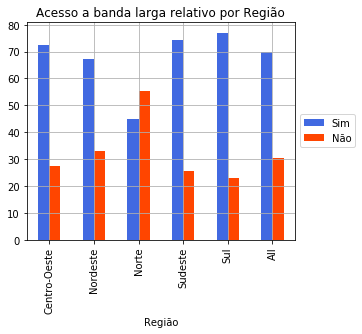

In [65]:

graph=acesso_região_relat.plot(kind='bar', title="Acesso a banda larga relativo por Região", color=["royalblue", "orangered"])
plt.grid()
#legenda para fora:
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


In [66]:
#tipo de domicílio por Região:
dom_reg_relat=pd.crosstab(dados_filt.Região, dados_filt.Tipo_de_domicílio,  margins=True, rownames=['Região'], colnames=['Tipo de domicílio'], normalize="index")*100
dom_reg_relat=dom_reg_relat.round(decimals=2)
dom_reg_relat

Tipo de domicílio,Casa,Apartamento,Cômodo
Região,,,
Centro-Oeste,85.21,14.36,0.43
Nordeste,86.13,13.77,0.11
Norte,90.50,8.68,0.82
Sudeste,78.59,21.30,0.11
Sul,79.59,20.34,0.06
All,82.63,17.16,0.21


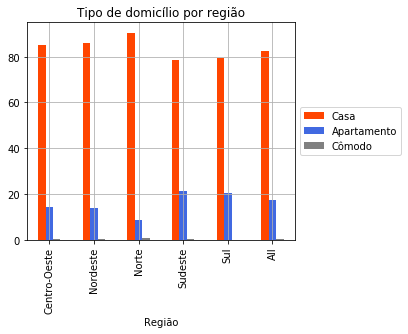

In [67]:

graph=dom_reg_relat.plot(kind='bar', title="Tipo de domicílio por região", color=["orangered", "royalblue", "grey"])
plt.grid()
#legenda para fora:
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


## Obs:

    Após primeira observação sobre os gráficos de tipo de domicílio por região e acesso a banda larga por região parece haver uma correlação entre acesso à banda larga e tipo de domicílio por região, assim pode-se dizer que provavelmente o tipo de domicílio é um dos fatores que afetam a presença de banda larga.
    Vale comentar que apesar de haver uma proporção aparente, em que quanto maior a proporção de casas, menor é a presença de banda larga, vistos nos exemplos da região norte que possue a maior quantidade de casas e a menor presença de banda larga e região sul que possue a menor quantidade de casas e a maior presença de banda larga.
(a mesma proporção se repete para a região nordeste e outras)
Apesar de haver tal proporção fica claro que não é direta e que está deve estar relacionado a questões de infraestrutura dos estados e regiões.

In [68]:
print("Renda Mensal na Região Sudeste")
print("")
print(dados_filt.renda_mensal[(dados_filt.Região=="Sudeste") & (dados_filt.renda_mensal<=4200) & (dados_filt.renda_mensal>893)].describe())
print("")

print("Renda Mensal na Região Sul")
print("")
print(dados_filt.renda_mensal[(dados_filt.Região=="Sul") & (dados_filt.renda_mensal<=4200) & (dados_filt.renda_mensal>893)].describe())
print("")

print("Renda Mensal na Região Norte")
print("")
print(dados_filt.renda_mensal[(dados_filt.Região=="Norte") & (dados_filt.renda_mensal<=4200) & (dados_filt.renda_mensal>350)].describe())
print("")

print("Renda Mensal na Região Nordeste")
print("")
print(dados_filt.renda_mensal[(dados_filt.Região=="Nordeste") & (dados_filt.renda_mensal<=4200) & (dados_filt.renda_mensal>350)].describe())
print("")

print("Renda Mensal da Região Centro-Oeste")
print("")
print(dados_filt.renda_mensal[(dados_filt.Região=="Centro-Oeste") & (dados_filt.renda_mensal<=420) & (dados_filt.renda_mensal>350)].describe())
print("")

Renda Mensal na Região Sudeste

count    11336.000000
mean      1772.093419
std        816.762468
min        894.000000
25%       1143.000000
50%       1500.000000
75%       2195.000000
max       4200.000000
Name: renda_mensal, dtype: float64

Renda Mensal na Região Sul

count    6893.000000
mean     1793.714783
std       801.668495
min       894.000000
25%      1166.000000
50%      1525.000000
75%      2200.000000
max      4200.000000
Name: renda_mensal, dtype: float64

Renda Mensal na Região Norte

count    5425.000000
mean     1103.156866
std       778.104074
min       351.000000
25%       546.000000
50%       825.000000
75%      1366.000000
max      4200.000000
Name: renda_mensal, dtype: float64

Renda Mensal na Região Nordeste

count    11722.000000
mean      1062.684695
std        773.904069
min        351.000000
25%        533.000000
50%        788.000000
75%       1266.000000
max       4200.000000
Name: renda_mensal, dtype: float64

Renda Mensal da Região Centro-Oeste

count   

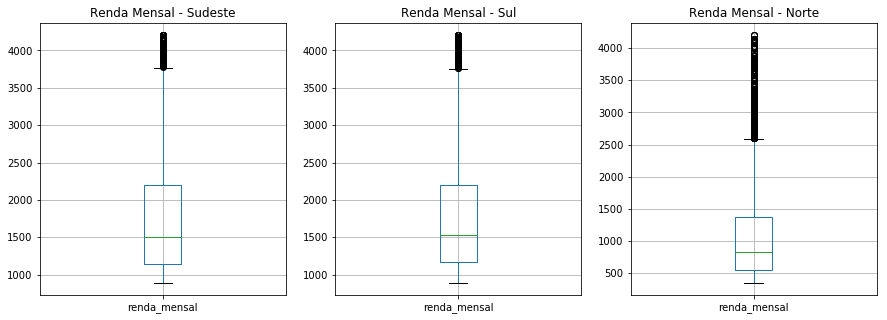

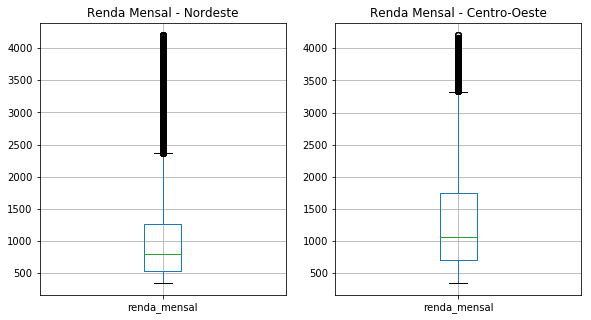

In [69]:
fig = plt.figure(figsize=(15,5))

plt.subplot(131)
plot = dados_filt.renda_mensal[(dados_filt.Região=="Sudeste") & (dados_filt.renda_mensal<=4200) & (dados_filt.renda_mensal>893)].plot(kind='box',title='Renda Mensal - Sudeste')#, color='red')
plt.grid(True)


plt.subplot(132)
plot = dados_filt.renda_mensal[(dados_filt.Região=="Sul") & (dados_filt.renda_mensal<=4200) & (dados_filt.renda_mensal>893)].plot(kind='box',title='Renda Mensal - Sul')#, color='red')
plt.grid(True)


plt.subplot(133)
plot = dados_filt.renda_mensal[(dados_filt.Região=="Norte") & (dados_filt.renda_mensal<=4200) & (dados_filt.renda_mensal>350)].plot(kind='box',title='Renda Mensal - Norte')#, color='red')
plt.grid(True)


plt.show()

fig = plt.figure(figsize=(15,5))

plt.subplot(131)
plot = dados_filt.renda_mensal[(dados_filt.Região=="Nordeste") & (dados_filt.renda_mensal<=4200) & (dados_filt.renda_mensal>350)].plot(kind='box',title='Renda Mensal - Nordeste')#, color='red')
plt.grid(True)


plt.subplot(132)
plot = dados_filt.renda_mensal[(dados_filt.Região=="Centro-Oeste") & (dados_filt.renda_mensal<=4200) & (dados_filt.renda_mensal>350)].plot(kind='box',title='Renda Mensal - Centro-Oeste')#, color='red')
plt.grid(True)


plt.show()

## Obs:

Os gráficos acima permitiram ver que mesmo através de uma observação geral de renda por região, a renda é um fator importantíssimo para a presença de banda larga uma vez que é um fator positivo em todos as formas, permite o consumo de bens para o lazer, permite investimentos no geral em estrutura e otimização que podem levar à queda de preços de serviços e demais.

A análise com relação à pesquisa foi à prevista as regiões com maior acessibilidade: Sul e Sudeste posuiam as maiores rendas médias, as regiões com acesso intermediário possuiam acesso intermediário e o padrão se repetiu para as com menor acessibilidade.

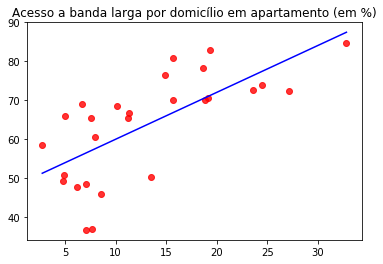

In [70]:
#acesso_estado_relat.Sim
#dom_reg_relat.Apartamento

acesso_estado_relat=pd.crosstab(dados_filt.estado, dados_filt.acesso_a_banda_larga, rownames=['Estado'], colnames=['Banda larga'], normalize="index")*100
acesso_estado_relat=acesso_estado_relat.round(decimals=2)

dom_est_relat=pd.crosstab(dados_filt.estado, dados_filt.Tipo_de_domicílio, rownames=['Estado'], colnames=['Tipo de domicílio'], normalize="index")*100
dom_est_relat=dom_est_relat.round(decimals=2)


a = dom_est_relat.Apartamento.cov(acesso_estado_relat.Sim) / dom_est_relat.Apartamento.var()
b = acesso_estado_relat.Sim.mean() - a*dom_est_relat.Apartamento.mean()

plt.scatter(dom_est_relat.Apartamento, acesso_estado_relat.Sim, c='red', alpha=0.8)
plt.title("Acesso a banda larga por domicílio em apartamento (em %)")
plt.plot((dom_est_relat.Apartamento.min(), dom_est_relat.Apartamento.max()), (a*dom_est_relat.Apartamento.min()+b, a*dom_est_relat.Apartamento.max()+b), color='blue')
plt.show()

## Obs:
nota-se que há uma correlação quase linear entre banda larga e domicílio do tipo apartamento. Pode-se supor que se dá ao fato de prédios terem uma instalção geral de cabos de fibra ótica, facilitando e reduzindo o preço da banda larga para moradores de apartamento; no caso de casas geralmente deve-se pagar também pela instalação elétrica de cabos de fibra ótica.
- 


In [71]:
pib=np.array([["São Paulo",1858,78.25],   #dados do PIB extraídos da internet
             ["Rio de Janeiro",671,72.34], #PIB em Bilhões de Reais
             ["Minas Gerais",516,70.63],   #2015
             ["Amazonas",86.6,50.27],
             ["Rio Grande do Sul",357.8,72.62],    #como foi criado manualmente o 
             ["Bahia",223.9,70.17],                #banco de dados com o PIB de
             ["Piauí",37.7, 49.28],                # de cada estado também foi 
             ["Maranhão",76.8, 45.89],             #necessário cruzar manualmente 
             ["Ceará",126, 66.73],                 # a acessibilidade a banda larga 
             ["Sergipe",37.4, 47.91],              # obtida anteriormente. 
             ["Alagoas",40.9, 65.57],
             ["Pernambuco",155.1, 76.49],
             ["Rio Grande do Norte",54,68.49],
             ["Paraíba",52.9,70.08],
             ["Espírito Santo",128.7,73.82],
             ["Goiás",165,69.07],
             ["Distríto Federal",197.4, 84.55],
             ["Mato Grosso do Sul",78.9,65.94],
             ["Mato Grosso",101.2,65.58],
             ["Tocantis",26.1, 58.65],
             ["Pará",124.5, 37.13],
             ["Rondônia",34, 60.73],
             ["Acre",13.4, 48.68],
             ["Roráima",9.7,50.81],
             ["Amapá",13.4, 36.83],
             ["Santa Catarina",242.5, 82.86],
             ["Paraná",348,80.84],])

dados_PIB=pd.DataFrame(pib) 

dados_PIB.columns=["estado", "PIB","acesso_a_banda_larga"]
#dados_PIB.PIB
dados_PIB.PIB=dados_PIB.PIB.astype("float")
dados_PIB.acesso_a_banda_larga=dados_PIB.acesso_a_banda_larga.astype("float")

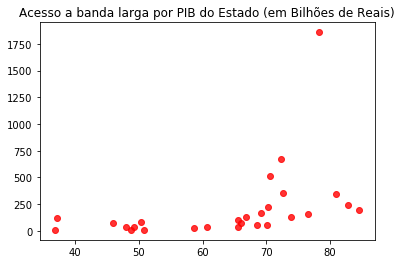

In [72]:
acesso_estado_relat=pd.crosstab(dados_filt.estado, dados_filt.acesso_a_banda_larga, rownames=['Estado'], colnames=['Banda larga'], normalize="index")*100
acesso_estado_relat=acesso_estado_relat.round(decimals=2)

a = dados_PIB.PIB.cov(dados_PIB.acesso_a_banda_larga) / dados_PIB.PIB.var()
b = dados_PIB.acesso_a_banda_larga.mean() - a*dados_PIB.PIB.mean()

plt.scatter(dados_PIB.acesso_a_banda_larga, dados_PIB.PIB, c='red', alpha=0.8)
plt.title("Acesso a banda larga por PIB do Estado (em Bilhões de Reais)")
#plt.plot((dados_PIB.PIB.min(), dados_PIB.PIB.max()), (a*dados_PIB.PIB.min()+b, a*dados_PIB.PIB.max()+b), color='blue')
plt.show()

## Obs:
A relação aparente entre o PIB do estado e a acessibilidade à internet parece ser tenua, isto é para valores mais altos de PIB pode-se ver um leve crescimento na acessibilidade, porém há estados com PIB pouco elevado que possuem alta acessibilidade a banda larga provavelmente decorrente de outros fatores já vistos como a porcentagem de moradias em apartamento; Muito provavelmente o baixo efeito do PIB no fator estudado se dá pois este variável se distancia muito do indivíduo consumidor e acaba sendo muito geral para gerar uma relação como renda mensal média ou moradia.

In [73]:
print("- Análise de renda de quem  possui acesso a banda larga:")
print("")
print(dados_filt.renda_mensal[(dados_filt.acesso_a_banda_larga=="Sim") & (dados_filt.renda_mensal<=5000)].describe())

print("")

print("- Análise de renda de quem não possuie acesso a banda larga:")
print("")
print(dados_filt.renda_mensal[(dados_filt.acesso_a_banda_larga=="Não") & (dados_filt.renda_mensal<=2000)].describe())

- Análise de renda de quem  possui acesso a banda larga:

count    42916.000000
mean      1343.191537
std       1039.879085
min          0.000000
25%        600.000000
50%       1000.000000
75%       1750.000000
max       5000.000000
Name: renda_mensal, dtype: float64

- Análise de renda de quem não possuie acesso a banda larga:

count    18786.000000
mean       692.508304
std        438.700640
min          0.000000
25%        364.000000
50%        594.500000
75%        937.000000
max       2000.000000
Name: renda_mensal, dtype: float64


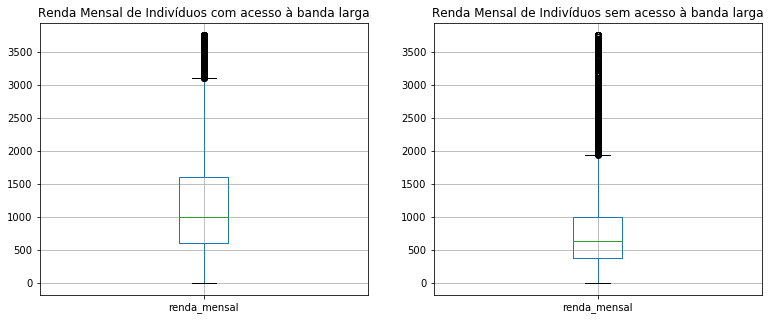

In [74]:
fig = plt.figure(figsize=(20,5))

plt.subplot(131)
plot = dados_filt.renda_mensal[(dados_filt.acesso_a_banda_larga=="Sim") & (dados_filt.renda_mensal<=3750)].plot(kind='box',title='Renda Mensal de Indivíduos com acesso à banda larga')#, color='red')
plt.grid(True)

plt.subplot(132)
plot = dados_filt.renda_mensal[(dados_filt.acesso_a_banda_larga=="Não") & (dados_filt.renda_mensal<=3750)].plot(kind='box',title='Renda Mensal de Indivíduos sem acesso à banda larga')#, color='red')
plt.grid(True)

plt.show()

## Obs:
Apesar de o PIB de cada estado não ser um fator que afeta a acessibilidade a banda larga, é previsível que a riqueza de um indivíduo afeta seu acesso a banda larga, logo quando se observa a questão de forma mais próxima fica claro a relação.
- Fica claro o efeito de renda média na acessibilidade uma vez que se ve a enorme discrepancia entre a renda média de indivíduos com acesso comparado com a dos que não o possuem, sendo a  renda média dos que tem acesso quase o dobro da renda média dos que não a possuem.

In [75]:
banda_larga_SP=dados_filt.acesso_a_banda_larga[(dados_filt.estado=="São Paulo")].value_counts(sort=False)

banda_larga_MA=dados_filt.acesso_a_banda_larga[(dados_filt.estado=="Maranhão")].value_counts(sort=False)

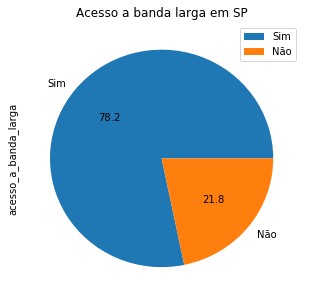

In [76]:
plot=banda_larga_SP.plot(kind='pie', title='Acesso a banda larga em SP',legend=("possuí","não possuí"),autopct='%.1f',figsize=(5,5))

#acesso a banda larga em SP

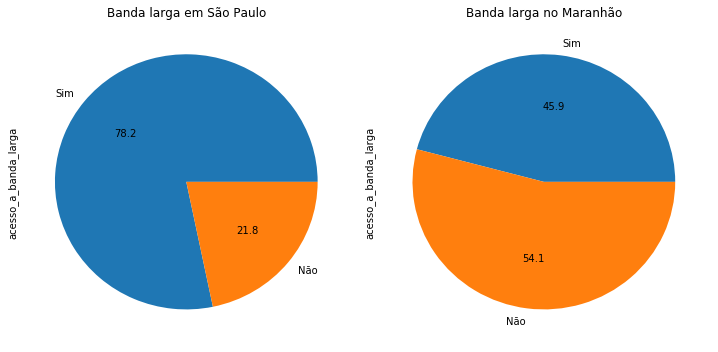

In [77]:
#através de pesquisa na internet se obteve que o estado com o maior PIB no Brasil é São Paulo e o com o menor, é Maranhão

fig = plt.figure(figsize=(15,5))

plt.subplot(131)
plot = banda_larga_SP.plot(kind='pie',title='Banda larga em São Paulo',autopct='%.1f')

plt.subplot(132)
plot = banda_larga_MA.plot(kind='pie',title='Banda larga no Maranhão',autopct='%.1f')


plt.tight_layout()
plt.show()

## Conclusão da análise de relações (2015):
- Partindo do gráfico acima será feita a seguir uma breve análise geral da pesquisa para se obter uma conclusão sólida:

O gráfico acima ajuda a reforçar análises anteriores, em que a riqueza de um estado ou região, a proporção entre casas e apartamentos da mesma, dentre outros fatores que indicam desenvolvimento afeta a presença de de banda larga.

Por exemplo: o estado de SP como o mais rico e mais urbanizado de todos, apresenta a maior presença de banda larga, ou seja se mostra como o estado mais bem estruturado e economicamente estável, enquanto Maranhão que é um estado com o menor PIB do Brasil e com baixa urbanização mostra baixíssima presença de banda larga. 

Note no entando que apesar de ser o estado com menor PIB não é o estado com menor urbanização demonstrando assim de forma muito explícita que fatores como renda da população podem afetar a presença de banda larga, mas o grau de urbanização também é fator importante. 

Tendo os gráficos e análises anteriores (ao longo desta pesquisa) como base pode-se aprofundar a análise, concluindo que a presença de banda larga é um fenômeno complexo, que não depende primariamente de apenas um fator, mas sim de vários fatores que podem ser vistos tanto como independentes como interligados; 

Veja: uma região pode ter alto urbanização o que permite a venda de banda larga, porém se a renda per capita média for baixa, a população não irá adquirir banda larga. (note que o inverso também é verdadeiro, pode haver dinheiro mas não adianta se não houver estrurura).

* Alto nível de urbanização e renda média alta geralmente "andam" juntas, porém não é uma certeza, logo o exempo acima pode acontecer.

Uma certeza é gerada de forma geral: a presença de banda larga em uma área ou região, geralmente será indicador de uma série de boas condições, como renda média, urbanização, presença de mercado fornecedor, dentre outros.

* Assim pode-se prever presença de banda larga por diversos indicadores de desenvolvimento e boas condições, assim como se pode prever alguns deles por ela, no caso das relações mais fortes como renda por exemplo que foi analisáda diversas vezes ao longo deste projeto.


- Obs final: curiosamente o fator que inspirou está pesquisa, que era PIB de um estado ou região não erá um fator que gerava interferência precisa ou mensurável com segurança na presença de banda larga. Pode-se apenas inferir que isto deve ter ocorrido pois o PIB é uma característica muito geral e dada a sua distribuição ela acaba por não gerar relação visível, salvo apenas os casos de extrema riqueza ou pobreza, mas como estes foram poucos não se pode nem  ter certeza destes.


### A seguir será feita a mesma análise para os anos anteriores a fim de observar o avanço da acessibilidade e se os padrões observados previamente se mantiveram nos anos anteriores:

## 2013

In [94]:
dados=pd.read_csv('DOM2013csv.zip',sep=',')
dados_geral=pd.read_csv('DOM2013csv.zip',sep=',')

In [95]:
#dados Brasil inteiro:

dados_geral.V02322=dados_geral.V02322.astype("category") #acesso no próprio domicílio
dados_geral.V02322.cat.categories=(['Sim', 'Não'])

dados_geral.V02323=dados_geral.V02323.astype("category") #acesso por microcomputador
dados_geral.V02323.cat.categories=(['Sim', 'Não'])

dados_geral.V02324=dados_geral.V02324.astype("category") #acesso por telefone
dados_geral.V02324.cat.categories=(['Sim', 'Não'])

dados_geral.V02325=dados_geral.V02325.astype("category") #acesso por tablet
dados_geral.V02325.cat.categories=(['Sim', 'Não'])

dados_geral.V02326=dados_geral.V02326.astype("category") #acesso pela TV
dados_geral.V02326.cat.categories=(['Sim', 'Não'])

dados_geral.V02327=dados_geral.V02327.astype("category") #acesso por outras formas
dados_geral.V02327.cat.categories=(['Sim', 'Não'])

dados_geral.V02424=dados_geral.V02424.astype("category") #acesso através de rede celular 
dados_geral.V02424.cat.categories=(['Sim', 'Não'])

dados_geral.V02425=dados_geral.V02425.astype("category") #acesso por linha telefônica
dados_geral.V02425.cat.categories=(['Sim', 'Não'])

dados_geral.V02426=dados_geral.V02426.astype("category") #acesso de banda larga 
dados_geral.V02426.cat.categories=(['Sim', 'Não'])

dados_geral.V0202=dados_geral.V0202.astype("category") #tipo de domicílio
dados_geral.V0202.cat.categories=(["Casa","Apartamento","Cômodo"])

#dados_geral.V8005=dados_geral.V8005.astype("category") #idade

#dados_geral.V4622 #faixa da renda mensal
#dados_geral.V4621 #renda mensal

dados_geral.UF=dados_geral.UF.astype("category") #estados do Brasil
dados_geral.UF.cat.categories=(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia', 'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná', 'Santa Catarina', 'Rio Grande do Sul', 'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'])


In [111]:
dados_filt=pd.DataFrame()

dados_t=dados_geral[(dados_geral.V0202.notnull()) & (dados_geral.V4622.notnull()) & (dados_geral.V4621.notnull()) & (dados_geral.V02426.notnull()) & (dados_geral.V4105.notnull()) & (dados_geral.V02425.notnull()) & (dados_geral.V02424.notnull()) & (dados_geral.V02327.notnull()) & (dados_geral.V02326.notnull()) & (dados_geral.V02325.notnull()) & (dados_geral.V02324.notnull())  & (dados_geral.V02323.notnull())  & (dados_geral.V02322.notnull())]

#Criando colunas:
dados_filt["acesso_a_banda_larga"]=dados_t.V02426
dados_filt["acesso por telefone"]=dados_t.V02324
dados_filt["estado"]=dados_geral.UF
dados_filt["renda_mensal"]=dados_t.V4621
dados_filt.renda_mensal=dados_filt.renda_mensal[dados_filt.renda_mensal!=999999999999]
dados_filt["faixa_da_renda_mensal"]=dados_t.V4622
dados_filt["Tipo_de_domicílio"]=dados_t.V0202
#dados_filt["idade"]=dados_t.V8005

(dados_filt.renda_mensal).round(decimals=1)

dados_filt.loc[(dados_geral.V02426=='Sim') | (dados_geral.V02425=='Sim') | (dados_geral.V02424=='Sim') | (dados_geral.V02327=='Sim') | (dados_geral.V02326=='Sim') | (dados_geral.V02325=='Sim') | (dados_geral.V02324=='Sim') | (dados_geral.V02323=='Sim') | (dados_geral.V02322=='Sim'), 'acesso_a_internet']='possuí'
dados_filt.loc[(dados_geral.V02426=='Não') & (dados_geral.V02425=='Não') &  (dados_geral.V02424=='Não') &  (dados_geral.V02327=='Não') &  (dados_geral.V02326=='Não') &  (dados_geral.V02325=='Não') &  (dados_geral.V02324=='Não') &  (dados_geral.V02323=='Não') &  (dados_geral.V02322=='Não'), 'acesso_a_internet']='não possuí'

dados_filt.loc[(dados_geral.UF=="São Paulo") | (dados_geral.UF=="Rio de Janeiro") | (dados_geral.UF=="Espírito Santo") | (dados_geral.UF=="Minas Gerais") ,"Região"]="Sudeste"
dados_filt.loc[(dados_geral.UF=="Amazonas") | (dados_geral.UF=="Pará") | (dados_geral.UF=="Amapá") | (dados_geral.UF=="Tocantis") | (dados_geral.UF=="Rondônia") | (dados_geral.UF=="Roraima") |  (dados_geral.UF=="Acre"),"Região"]="Norte"
dados_filt.loc[(dados_geral.UF=="Bahia") | (dados_geral.UF=="Piauí") | (dados_geral.UF=="Maranhão") | (dados_geral.UF=="Ceará") | (dados_geral.UF=="Paraíba") | (dados_geral.UF=="Pernambuco") | (dados_geral.UF=="Alagoas") | (dados_geral.UF=="Sergipe") | (dados_geral.UF=="Rio Grande do Norte"),"Região"]="Nordeste"
dados_filt.loc[(dados_geral.UF=="Mato Grosso") | (dados_geral.UF=="Goiás") | (dados_geral.UF=="Mato Grosso do Sul") | (dados_geral.UF=="Distrito Federal") ,"Região"]="Centro-Oeste"
dados_filt.loc[(dados_geral.UF=="Rio Grande do Sul") | (dados_geral.UF=="Santa Catarina") | (dados_geral.UF=="Paraná") ,"Região"]="Sul"




In [97]:
#cruzar acesso a banda larga com região

acesso_região=pd.crosstab(dados_filt.Região, dados_filt.acesso_a_banda_larga, margins=True, rownames=['Região'], colnames=['Acesso:'])

print("acesso absoluto a banda larga por região")

acesso_região

acesso absoluto a banda larga por região


Acesso:,Sim,Não,All
Região,,,
Centro-Oeste,4796,1478,6274
Nordeste,8571,3298,11869
Norte,2828,2932,5760
Sudeste,16168,3790,19958
Sul,8426,2174,10600
All,40789,13672,54461


In [98]:
acesso_Sudeste_relt=pd.crosstab(dados_filt.Região[dados_filt.Região=="Sudeste"], dados_filt.acesso_a_banda_larga[dados_filt.Região=="Sudeste"], rownames=['Região'], colnames=['Banda larga'], normalize="index")*100
acesso_Sudeste_relt=acesso_Sudeste_relt.round(decimals=2)

In [99]:
acesso_região_relat=pd.crosstab(dados_filt.Região, dados_filt.acesso_a_banda_larga, margins=True, rownames=['Região'], colnames=['Banda larga'], normalize="index")*100
acesso_região_relat=acesso_região_relat.round(decimals=2)

print("acesso a banda larga relativo por região")

acesso_região_relat 

acesso a banda larga relativo por região


Banda larga,Sim,Não
Região,,
Centro-Oeste,76.44,23.56
Nordeste,72.21,27.79
Norte,49.10,50.90
Sudeste,81.01,18.99
Sul,79.49,20.51
All,74.90,25.10


## Obs:
apesar da queda do acesso a banda larga relativo, têm-se um aumento nos números absolutos e nos números de acesso geral

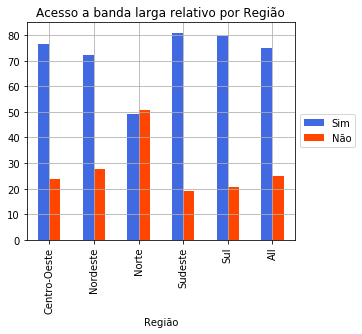

In [100]:

graph=acesso_região_relat.plot(kind='bar', title="Acesso a banda larga relativo por Região", color=["royalblue", "orangered"])
plt.grid()
#legenda para fora:
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


## Obs:

Pode-se observar que entre 2013 e 2015 as regiões mais ricas e mais urbanizadas mantiveram uma porcentagem alta (mesmo que um uma leve queda) de acesso a banda larga, porém as regiões Norte e Nordeste parecem ter sofrido uma queda na presença relativa considerável (por volta de 5%), sendo sua acessibilidade maior em 2013. 

(apesar de queda de acessibilidade ter sido geral no país está fico mais visível em regiões que já possuiam baixa acessibilidade)

Através de uma breve pesquisa na internet foi possível descobrir que oque era considerado "banda larga" em 2013 era razoavelmente mais baixo e tinha um preço menor, ou seja como "banda larga" é algo relativo ao longo do tempo pode-se prever que provalvelmente haverá uma queda na acessibilidade por parte das camadas mais pobres ao longo do tempo, devido ao aumento da banda e do preço, a não ser que algum  fator como queda do preço ou aumento da renda média entre em ação (e o preço se mantenha um mínimo estável).

In [101]:
#tipo de domicílio por Região:
dom_reg_relat=pd.crosstab(dados_filt.Região, dados_filt.Tipo_de_domicílio,  margins=True, rownames=['Região'], colnames=['Tipo de domicílio'], normalize="index")*100
dom_reg_relat=dom_reg_relat.round(decimals=2)
dom_reg_relat

Tipo de domicílio,Casa,Apartamento,Cômodo
Região,,,
Centro-Oeste,82.88,16.85,0.27
Nordeste,81.63,18.27,0.09
Norte,89.11,10.05,0.83
Sudeste,77.41,22.47,0.12
Sul,78.39,21.58,0.04
All,80.39,19.42,0.19


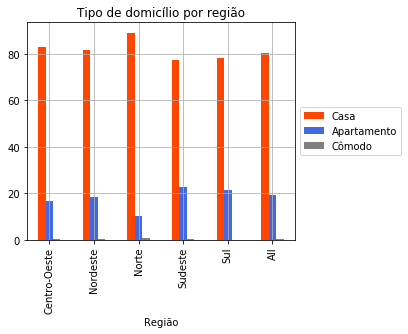

In [102]:

graph=dom_reg_relat.plot(kind='bar', title="Tipo de domicílio por região", color=["orangered", "royalblue", "grey"])
plt.grid()
#legenda para fora:
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


## Obs:
O percentual de moradias em "casa" e "apartamento" se manteve razoavelmente estável de 2013 à 2015, porém com um leve almento (em média 2-3%).


In [103]:
print("Renda Mensal na Região Sudeste")
print("")
print(dados_filt.renda_mensal[(dados_filt.Região=="Sudeste") & (dados_filt.renda_mensal<=4200) & (dados_filt.renda_mensal>893)].describe())
print("")

print("Renda Mensal na Região Sul")
print("")
print(dados_filt.renda_mensal[(dados_filt.Região=="Sul") & (dados_filt.renda_mensal<=4200) & (dados_filt.renda_mensal>893)].describe())
print("")

print("Renda Mensal na Região Norte")
print("")
print(dados_filt.renda_mensal[(dados_filt.Região=="Norte") & (dados_filt.renda_mensal<=4200) & (dados_filt.renda_mensal>350)].describe())
print("")

print("Renda Mensal na Região Nordeste")
print("")
print(dados_filt.renda_mensal[(dados_filt.Região=="Nordeste") & (dados_filt.renda_mensal<=4200) & (dados_filt.renda_mensal>350)].describe())
print("")

print("Renda Mensal da Região Centro-Oeste")
print("")
print(dados_filt.renda_mensal[(dados_filt.Região=="Centro-Oeste") & (dados_filt.renda_mensal<=420) & (dados_filt.renda_mensal>350)].describe())
print("")

Renda Mensal na Região Sudeste

count    8770.000000
mean     1775.004447
std       814.990565
min       894.000000
25%      1128.000000
50%      1500.000000
75%      2200.000000
max      4200.000000
Name: renda_mensal, dtype: float64

Renda Mensal na Região Sul

count    5487.000000
mean     1768.829597
std       802.553484
min       894.000000
25%      1139.000000
50%      1500.000000
75%      2166.000000
max      4200.000000
Name: renda_mensal, dtype: float64

Renda Mensal na Região Norte

count    4001.000000
mean     1112.653837
std       777.841995
min       351.000000
25%       564.000000
50%       839.000000
75%      1379.000000
max      4200.000000
Name: renda_mensal, dtype: float64

Renda Mensal na Região Nordeste

count    8015.000000
mean     1092.879102
std       792.407341
min       351.000000
25%       539.000000
50%       800.000000
75%      1350.000000
max      4200.000000
Name: renda_mensal, dtype: float64

Renda Mensal da Região Centro-Oeste

count    220.000000
mean

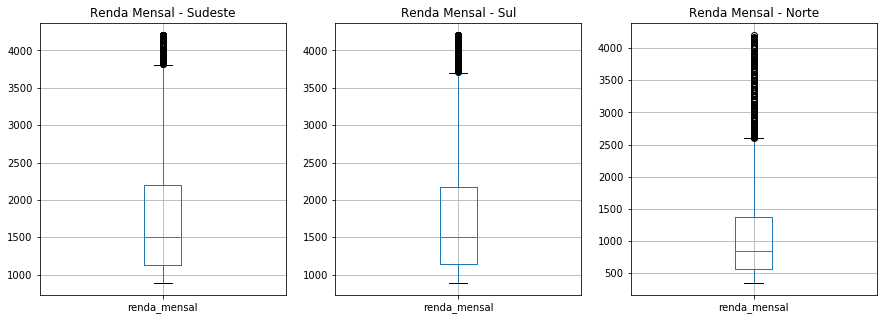

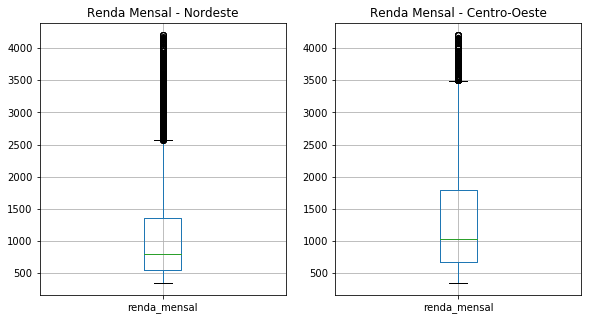

In [104]:
fig = plt.figure(figsize=(15,5))

plt.subplot(131)
plot = dados_filt.renda_mensal[(dados_filt.Região=="Sudeste") & (dados_filt.renda_mensal<=4200) & (dados_filt.renda_mensal>893)].plot(kind='box',title='Renda Mensal - Sudeste')#, color='red')
plt.grid(True)


plt.subplot(132)
plot = dados_filt.renda_mensal[(dados_filt.Região=="Sul") & (dados_filt.renda_mensal<=4200) & (dados_filt.renda_mensal>893)].plot(kind='box',title='Renda Mensal - Sul')#, color='red')
plt.grid(True)


plt.subplot(133)
plot = dados_filt.renda_mensal[(dados_filt.Região=="Norte") & (dados_filt.renda_mensal<=4200) & (dados_filt.renda_mensal>350)].plot(kind='box',title='Renda Mensal - Norte')#, color='red')
plt.grid(True)


plt.show()

fig = plt.figure(figsize=(15,5))

plt.subplot(131)
plot = dados_filt.renda_mensal[(dados_filt.Região=="Nordeste") & (dados_filt.renda_mensal<=4200) & (dados_filt.renda_mensal>350)].plot(kind='box',title='Renda Mensal - Nordeste')#, color='red')
plt.grid(True)


plt.subplot(132)
plot = dados_filt.renda_mensal[(dados_filt.Região=="Centro-Oeste") & (dados_filt.renda_mensal<=4200) & (dados_filt.renda_mensal>350)].plot(kind='box',title='Renda Mensal - Centro-Oeste')#, color='red')
plt.grid(True)


plt.show()

## Obs:
Entre 2013 e 2015 houve um aumento pequeno nas rendas médias das regiões Sudeste e Sul e uma queda equivalente nas regiões Norte, Nordeste e Centro-Oeste.

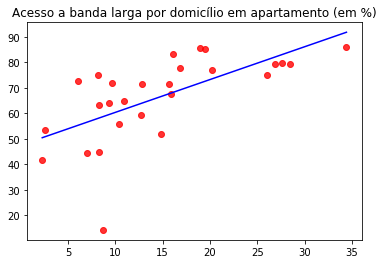

In [105]:
#acesso_estado_relat.Sim
#dom_reg_relat.Apartamento

acesso_estado_relat=pd.crosstab(dados_filt.estado, dados_filt.acesso_a_banda_larga, rownames=['Estado'], colnames=['Banda larga'], normalize="index")*100
acesso_estado_relat=acesso_estado_relat.round(decimals=2)

dom_est_relat=pd.crosstab(dados_filt.estado, dados_filt.Tipo_de_domicílio, rownames=['Estado'], colnames=['Tipo de domicílio'], normalize="index")*100
dom_est_relat=dom_est_relat.round(decimals=2)


a = dom_est_relat.Apartamento.cov(acesso_estado_relat.Sim) / dom_est_relat.Apartamento.var()
b = acesso_estado_relat.Sim.mean() - a*dom_est_relat.Apartamento.mean()

plt.scatter(dom_est_relat.Apartamento, acesso_estado_relat.Sim, c='red', alpha=0.8)
plt.title("Acesso a banda larga por domicílio em apartamento (em %)")
plt.plot((dom_est_relat.Apartamento.min(), dom_est_relat.Apartamento.max()), (a*dom_est_relat.Apartamento.min()+b, a*dom_est_relat.Apartamento.max()+b), color='blue')
plt.show()

## Obs: 
Observando o gráfico de acesso por tipo de domicílio em 2013 foi possível ver que a relação de entre estes fatores se manteve ao longo dos, sendo que o coeficiente de correlação linear era maior em 2013 do que em 2015, situação que provavelmente ocorre pois em 2013 a acessibilidade era maior, fazendo com que a correlação entre moradia e acessibilidade fica-se mais aparente.

In [106]:
print("- Análise de renda de quem  possui acesso a banda larga:")
print("")
print(dados_filt.renda_mensal[(dados_filt.acesso_a_banda_larga=="Sim") & (dados_filt.renda_mensal<=5000)].describe())

print("")

print("- Análise de renda de quem não possuie acesso a banda larga:")
print("")
print(dados_filt.renda_mensal[(dados_filt.acesso_a_banda_larga=="Não") & (dados_filt.renda_mensal<=2000)].describe())

- Análise de renda de quem  possui acesso a banda larga:

count    36000.000000
mean      1293.324944
std       1036.528793
min          0.000000
25%        575.000000
50%        966.000000
75%       1668.000000
max       5000.000000
Name: renda_mensal, dtype: float64

- Análise de renda de quem não possuie acesso a banda larga:

count    12148.000000
mean       693.318242
std        454.407070
min          0.000000
25%        345.000000
50%        595.000000
75%        944.000000
max       2000.000000
Name: renda_mensal, dtype: float64


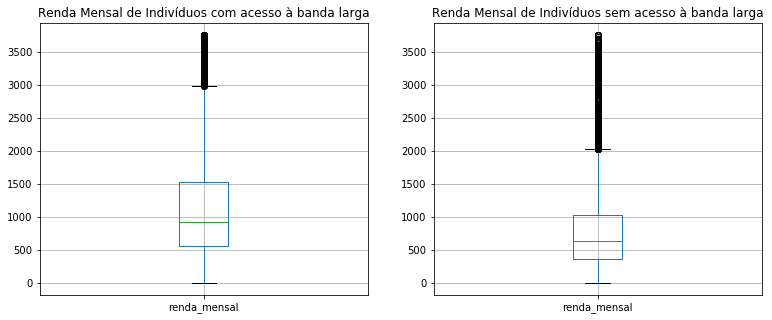

In [107]:
fig = plt.figure(figsize=(20,5))

plt.subplot(131)
plot = dados_filt.renda_mensal[(dados_filt.acesso_a_banda_larga=="Sim") & (dados_filt.renda_mensal<=3750)].plot(kind='box',title='Renda Mensal de Indivíduos com acesso à banda larga')#, color='red')
plt.grid(True)

plt.subplot(132)
plot = dados_filt.renda_mensal[(dados_filt.acesso_a_banda_larga=="Não") & (dados_filt.renda_mensal<=3750)].plot(kind='box',title='Renda Mensal de Indivíduos sem acesso à banda larga')#, color='red')
plt.grid(True)

plt.show()

## Obs:
Entre 2013 e 2015 pode-se observar que houve um aumento na renda média das pessoas que tem acesso a banda larga e uma queda na das pessoas que não à possuem; 

- Voltando a uma análise anterior, viu-se que houve uma queda na acessibilidade devido ao aumento na banda e no preço da banda larga; 

Fica claro então que devido as mudanças no que é banda larga ocorre um processo de "elitização" em que a "banda larga" (de última geração") fica mais limitada a indivíduos com uma faixa de renda superior (a faixa de 50% dos que tem acesso é quase o dobro da dos que não possuem).

In [108]:
banda_larga_SP=dados_filt.acesso_a_banda_larga[(dados_filt.estado=="São Paulo")].value_counts(sort=False)

banda_larga_MA=dados_filt.acesso_a_banda_larga[(dados_filt.estado=="Maranhão")].value_counts(sort=False)

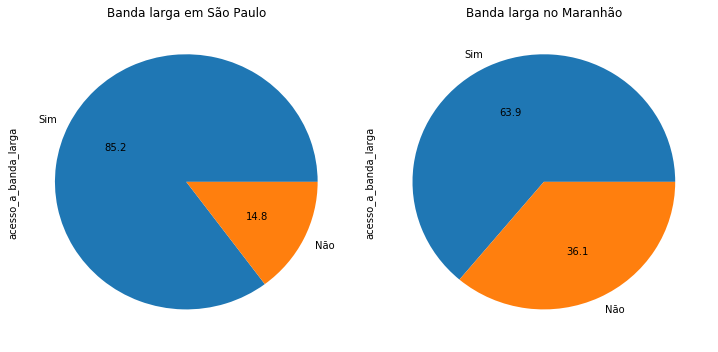

In [109]:
#através de pesquisa na internet se obteve que o estado com o maior PIB no Brasil é São Paulo e o com o menor, é Maranhão

fig = plt.figure(figsize=(15,5))

plt.subplot(131)
plot = banda_larga_SP.plot(kind='pie',title='Banda larga em São Paulo',autopct='%.1f')

plt.subplot(132)
plot = banda_larga_MA.plot(kind='pie',title='Banda larga no Maranhão',autopct='%.1f')


plt.tight_layout()
plt.show()

## Obs:
Observendo mais uma vez os gráficos de acessibilidade nos estados de São Paulo e Maranhão como parâmetro para observações (extremos) pode-se reforçar certas análises anteriores;
Por exemplo:
- fica visível uma queda na acessibilidade, mesmo nos estados desenvolvidos e uma queda mais intensa nos estados mais pobres
* 2013-2015 "São Paulo" teve uma queda de 7% na acessibilidade
* 2013-2015 "Maranhão" teve uma queda de 18% na acessibilidade

(A queda referênciada acima também reforça a mudança na banda larga, que fez com que mesmo em regiões desenvolvidas e com crescimento tivessem queda na acessibilidade)

(Vale comentar que apesar de o preço do acesso a internet ter caido ao longo dos anos, a banda larga aumentou e assim  como seu preço)


## Conclusão:

